In [31]:
#stock prediction model GETs best results with linear regression model
import numpy as np
import pandas as pd
from numpy import arange
from numpy import set_printoptions
from pandas import read_csv
from pandas import set_option
import seaborn as sns
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR


In [36]:
ticker="TSLA"# all the predictions have been done for TESLA.
token="sk_40697a48b07d41efbd1dc85d0f7c270f"
stdata=pd.read_json("https://cloud.iexapis.com/stable/stock/"+ticker+"/chart/1mm?token="+token+'',typ='frame',convert_dates=True)
stdata = pd.DataFrame(stdata)
stdata.head()

,date,minute,label,open,high,low,close,average,volume,notional,numberOfTrades,marketOpen,marketHigh,marketLow,marketClose,marketAverage,marketVolume,marketNotional,marketNumberOfTrades
0,2020-09-08,09:30,09:30,355.755,359.70,336.04,348.00,346.577324,408943,1.417304e+08,4021,356.000,359.710,335.99,348.440,347.307927,17145095,5.954630e+09,81392
1,2020-09-08,10:00,10:00,348.410,368.64,343.67,365.03,357.027667,233403,8.333136e+07,2738,348.260,368.740,343.51,365.395,357.274100,10079124,3.601010e+09,51780
2,2020-09-08,10:30,10:30,365.110,367.99,353.09,361.48,359.497804,90457,3.251910e+07,1266,365.100,368.337,353.00,361.630,359.951301,5998744,2.159256e+09,29516
3,2020-09-08,11:00,11:00,361.770,362.74,356.04,357.41,358.747858,42957,1.541073e+07,543,361.690,362.800,356.00,357.440,359.110341,3632983,1.304642e+09,17079
4,2020-09-08,11:30,11:30,358.470,358.47,347.52,356.51,352.761136,53284,1.879653e+07,690,357.418,358.710,347.26,356.540,352.682028,4630463,1.633081e+09,21204


In [37]:
stdata.set_index('minute',inplace=True)#getting data after every 10 minutes for today with TIMESTAMP.
#st_hist=stdata[['open','high','low','close','volume']]
#print(st_hist.head(195))
#print(len(st_hist))# TO GET TOTAL NUMBER OF ROWS .
print(stdata)

             date  label  ...  marketNotional  marketNumberOfTrades
minute                    ...                                      
09:30  2020-09-08  09:30  ...    5.954630e+09                 81392
10:00  2020-09-08  10:00  ...    3.601010e+09                 51780
10:30  2020-09-08  10:30  ...    2.159256e+09                 29516
11:00  2020-09-08  11:00  ...    1.304642e+09                 17079
11:30  2020-09-08  11:30  ...    1.633081e+09                 21204
...           ...    ...  ...             ...                   ...
13:30  2020-10-07  13:30  ...    9.569565e+08                  9973
14:00  2020-10-07  14:00  ...    9.140725e+08                  9487
14:30  2020-10-07  14:30  ...    5.951869e+08                  6689
15:00  2020-10-07  15:00  ...    4.333352e+08                  5390
15:30  2020-10-07  15:30  ...    7.215535e+08                  9058

[286 rows x 18 columns]


In [25]:
stdata=stdata.dropna()
stdata


,date,label,open,high,low,close,average,volume,notional,numberOfTrades,marketOpen,marketHigh,marketLow,marketClose,marketAverage,marketVolume,marketNotional,marketNumberOfTrades
minute,,,,,,,,,,,,,,,,,,
09:30,2020-09-08,09:30,355.755,359.700,336.04,348.00,346.577324,408943,1.417304e+08,4021,356.000,359.710,335.99,348.440,347.307927,17145095,5.954630e+09,81392
10:00,2020-09-08,10:00,348.410,368.640,343.67,365.03,357.027667,233403,8.333136e+07,2738,348.260,368.740,343.51,365.395,357.274100,10079124,3.601010e+09,51780
10:30,2020-09-08,10:30,365.110,367.990,353.09,361.48,359.497804,90457,3.251910e+07,1266,365.100,368.337,353.00,361.630,359.951301,5998744,2.159256e+09,29516
11:00,2020-09-08,11:00,361.770,362.740,356.04,357.41,358.747858,42957,1.541073e+07,543,361.690,362.800,356.00,357.440,359.110341,3632983,1.304642e+09,17079
11:30,2020-09-08,11:30,358.470,358.470,347.52,356.51,352.761136,53284,1.879653e+07,690,357.418,358.710,347.26,356.540,352.682028,4630463,1.633081e+09,21204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13:30,2020-10-07,13:30,428.510,429.880,426.69,427.25,428.651731,83027,3.558968e+07,1101,428.443,429.900,426.67,427.250,428.675467,2232356,9.569565e+08,9973
14:00,2020-10-07,14:00,427.220,428.640,425.36,427.76,427.136045,78088,3.335421e+07,970,427.250,428.640,425.36,427.855,427.160615,2139880,9.140725e+08,9487
14:30,2020-10-07,14:30,427.880,428.180,425.64,427.48,426.938866,53317,2.276311e+07,882,427.800,428.250,425.63,427.440,426.884633,1394257,5.951869e+08,6689


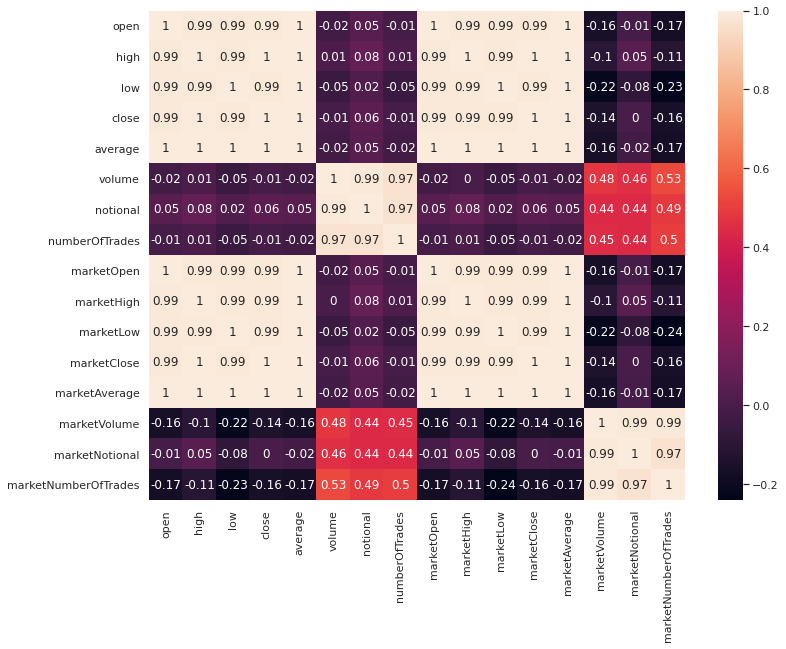

In [26]:
# with this i hope to gain insights  with this  heat map
correlation_matrix = stdata.corr().round(2)
sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(data=correlation_matrix,annot=True)

In [38]:
stdata.drop('numberOfTrades',axis=1, inplace=True)
stdata.drop('notional',axis=1, inplace=True)
stdata.drop('volume',axis=1, inplace=True)
stdata.drop('marketVolume',axis=1, inplace=True)
stdata.drop('marketNotional',axis=1, inplace=True)
stdata.drop('marketNumberOfTrades',axis=1, inplace=True)
stdata.drop('date',axis=1, inplace=True)
stdata.drop('label',axis=1, inplace=True)
print(stdata)
stdata.describe()# to better comprehend the dataset/ THESE REALLY HELPED WITH THE PREDICTIONS AS APPARENT IN THE CELLS BELOW.

           open     high     low  ...  marketLow  marketClose  marketAverage
minute                            ...                                       
09:30   355.755  359.700  336.04  ...     335.99      348.440     347.307927
10:00   348.410  368.640  343.67  ...     343.51      365.395     357.274100
10:30   365.110  367.990  353.09  ...     353.00      361.630     359.951301
11:00   361.770  362.740  356.04  ...     356.00      357.440     359.110341
11:30   358.470  358.470  347.52  ...     347.26      356.540     352.682028
...         ...      ...     ...  ...        ...          ...            ...
13:30   428.510  429.880  426.69  ...     426.67      427.250     428.675467
14:00   427.220  428.640  425.36  ...     425.36      427.855     427.160615
14:30   427.880  428.180  425.64  ...     425.63      427.440     426.884633
15:00   427.500  427.930  425.74  ...     425.67      426.155     426.876885
15:30   426.310  426.925  424.13  ...     424.07      425.190     425.213992

,open,high,low,close,average,marketOpen,marketHigh,marketLow,marketClose,marketAverage
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,412.231381,415.467343,408.669965,412.262150,412.147014,412.193245,415.637171,408.498028,412.262769,412.235741
std,28.950462,28.408968,29.572819,29.097989,28.994944,28.935647,28.388626,29.588298,29.109179,28.978369
min,338.720000,340.120000,330.020000,330.550000,333.535221,338.720000,340.512000,329.880000,330.020000,333.659666
25%,393.507500,397.882500,388.715000,394.741250,393.264469,393.726250,397.955000,388.698000,394.501750,393.685668
50%,421.215000,423.420000,418.610000,420.775000,421.071469,420.980000,423.562500,418.390000,420.975000,421.217162
75%,431.032500,433.937500,428.196250,430.690000,430.713352,430.756000,433.997500,428.025000,430.764250,430.734054
max,461.845000,461.890000,450.560000,461.320000,457.054485,461.820000,461.940000,450.500000,461.820000,456.966232


In [41]:
arr= stdata.values
X=arr[:,0:10]
Y=arr[:,9]
scaler=MinMaxScaler(feature_range=(0,1))
rX=scaler.fit_transform(X)
set_printoptions(precision=3)
print(rX[0:1,:])

[[0.138 0.161 0.05  0.133 0.106 0.14  0.158 0.051 0.14  0.111]]


In [42]:
validation_size =0.20
seed=7
X_Train,X_validation,Y_Train,Y_validation=train_test_split(rX,Y,test_size=validation_size,random_state=seed)

In [43]:
num_folds=3
seed=1
scoring ='r2'
# to select the model that is best fit for our data we try out a few
models=[]# list to store the models
models.append(('LR',LinearRegression()))
models.append(('LASSO',Lasso()))
models.append(('EN',ElasticNet()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('SVM',SVR()))# support vector machines
results=[]# to store the results of each model
names=[]
for name,model in models:
  Kfold=KFold(n_splits=num_folds,random_state=seed,shuffle=True)
  cv_results=cross_val_score(model,X_Train,Y_Train,cv=Kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  m="%s: %f (%f)"%(name,cv_results.mean(),cv_results.std())
  print(m)# it's clear from the r2 scores that linear regression is bestsuited for our predictions , also with 0 deviation . 
  #CART also seems to be doing pretty good on the data set


LR: 1.000000 (0.000000)
LASSO: 0.977728 (0.004235)
EN: 0.744267 (0.006723)
KNN: 0.996918 (0.001058)
CART: 0.994112 (0.001983)
SVM: 0.845736 (0.044872)


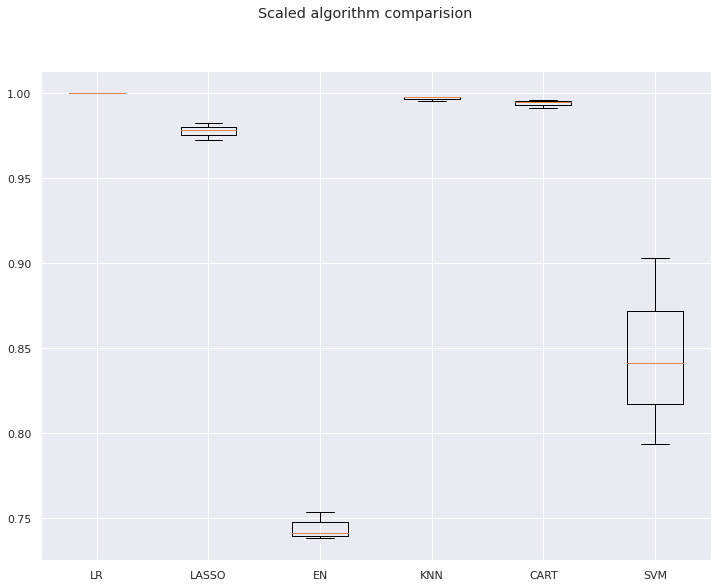

In [44]:
# comparing the algorithms
fig=pyplot.figure()
fig.suptitle('Scaled algorithm comparision')
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()
#therefore LR is the best to work with atleast for the current orientation of the dataset.

In [45]:
from sklearn.metrics import mean_squared_error, r2_score
model=LinearRegression(fit_intercept=True)
model.fit(X_Train,Y_Train)
#FROM THIS AND THE CELL its clear that LR is better for this 
predictions =model.predict(X_validation)
print(r2_score(Y_validation,predictions))
print(predictions)
print(Y_validation)

1.0
[426.384 442.034 422.076 450.301 444.476 426.877 417.256 388.074 404.298
 430.611 420.402 428.173 391.889 428.03  404.023 364.914 401.935 423.038
 422.333 444.593 395.448 444.987 414.73  420.902 423.773 430.705 359.951
 449.315 439.153 353.51  444.534 397.315 443.621 419.378 416.667 406.551
 399.617 440.501 387.814 436.304 425.603 425.064 423.876 380.654 379.933
 422.592 444.44  427.536 447.903 420.275 444.518 359.11  362.211 442.491
 430.577 442.854 438.619 408.738]
[426.384 442.034 422.076 450.301 444.476 426.877 417.256 388.074 404.298
 430.611 420.402 428.173 391.889 428.03  404.023 364.914 401.935 423.038
 422.333 444.593 395.448 444.987 414.73  420.902 423.773 430.705 359.951
 449.315 439.153 353.51  444.534 397.315 443.621 419.378 416.667 406.551
 399.617 440.501 387.814 436.304 425.603 425.064 423.876 380.654 379.933
 422.592 444.44  427.536 447.903 420.275 444.518 359.11  362.211 442.491
 430.577 442.854 438.619 408.738]


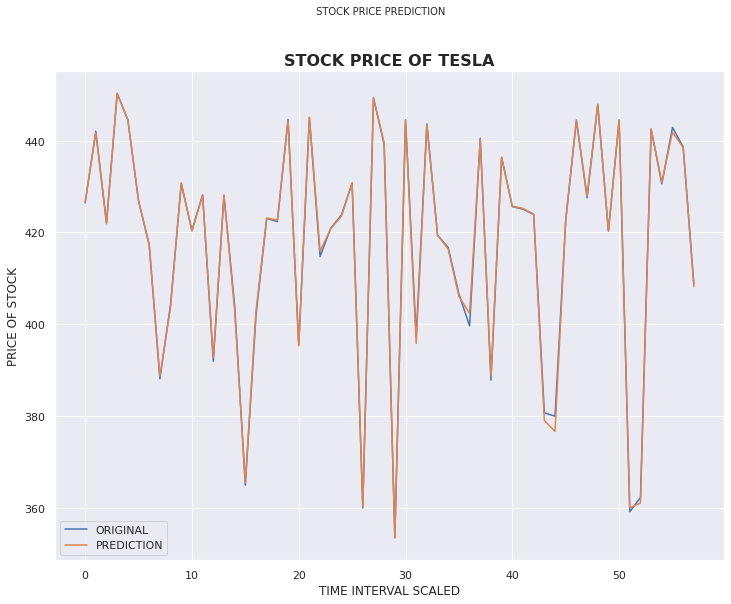

In [50]:
X=Y_validation
Y=predictions
plt.plot(X, label="ORIGINAL")
plt.plot(Y, label="PREDICTION")
plt.legend(loc='lower left')
plt.title("STOCK PRICE OF TESLA", fontsize=16, fontweight='bold')
plt.suptitle(" STOCK PRICE PREDICTION", fontsize=10)
plt.xlabel("TIME INTERVAL SCALED")
plt.ylabel("PRICE OF STOCK")
plt.show()# HENCE THE LR model has been very good at predictions.